# Setup cell

In [1]:
# Setup cell
import os
from dotenv import load_dotenv
import time
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
from endpoints import Endpoints
from metrics import Metrics
from platforms import Platforms

import github
import gitea_forgejo

# Load environment variables from .env file
load_dotenv()

# GitHub API Token
GITHUB_TOKEN = os.getenv("GITHUB_TOKEN")
GITLAB_TOKEN = os.getenv("GITLAB_TOKEN")
GITEA_TOKEN = os.getenv("GITEA_TOKEN")
FORGEJO_TOKEN = os.getenv("FORGEJO_TOKEN")
BITBUCKET_TOKEN = os.getenv("BITBUCKET_TOKEN")

# Headers for different platforms
GITHUB_HEADERS = {"Authorization": f"token {GITHUB_TOKEN}"}
GITEA_HEADERS = {"Authorization": f"token {GITEA_TOKEN}"}
FORGEJO_HEADERS = {"Authorization": f"token {FORGEJO_TOKEN}"}
GITLAB_HEADERS = {"PRIVATE-TOKEN": GITLAB_TOKEN}
BITBUCKET_HEADERS = {"Authorization": f"Bearer {BITBUCKET_TOKEN}"}

# Create an instance of the platforms class
github_instance = github.GitHub(GITHUB_HEADERS)
gitea_instance = gitea_forgejo.GiteaForgejo(GITEA_HEADERS)
forgejo_instance = gitea_forgejo.GiteaForgejo(FORGEJO_HEADERS)

# Fetching Repositories from Github

In [2]:
# Fetch repositories
data = github_instance.fetch_repositories(2)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("github_repositories_test.csv", index=False)
    print("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    print("No repositories were fetched.")

Fetching page 1...
Saved 1,000 repositories to 'github_repositories.csv'.


In [4]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "github_repositories_test.csv"  # Your input file
df = pd.read_csv(csv_file)

github_instance.add_metric(df, Platforms.GITHUB, Metrics.COMMITS)

# Save Updated CSV
output_file = "github_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

https://api.github.com/repos/bbannier/zeek-language-server/commits?per_page=1
1650
https://api.github.com/repos/bbannier/zeek-language-server/commits?per_page=1
https://api.github.com/repos/netbox-community/netbox-operator/commits?per_page=1
162
https://api.github.com/repos/netbox-community/netbox-operator/commits?per_page=1
https://api.github.com/repos/plum-k/plum-babylon-editor/commits?per_page=1
62
https://api.github.com/repos/plum-k/plum-babylon-editor/commits?per_page=1
https://api.github.com/repos/i2p/i2p.www/commits?per_page=1
6052
https://api.github.com/repos/i2p/i2p.www/commits?per_page=1
https://api.github.com/repos/greenpeace/planet4-master-theme/commits?per_page=1
5995
https://api.github.com/repos/greenpeace/planet4-master-theme/commits?per_page=1
https://api.github.com/repos/mixman1177/live/commits?per_page=1
591763
https://api.github.com/repos/mixman1177/live/commits?per_page=1
https://api.github.com/repos/Hannahejacruw3/DeFiSecurityAuditor/commits?per_page=1
38896
https:

# Fetching Repositories from Gitea

In [2]:
# Fetch repositories
data = gitea_instance.fetch_repositories(3)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("gitea_repositories_test.csv", index=False)
    print("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    print("No repositories were fetched.")

Fetching page 1...
Fetching page 2...
Saved 1,000 repositories to 'github_repositories.csv'.


In [2]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "gitea_repositories_test.csv"  # Your input file
df = pd.read_csv(csv_file)

gitea_instance.add_metric(df, Platforms.GITEA, Metrics.COMMITS)

# Save Updated CSV
output_file = "gitea_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

Error fetching Zhangliling/Zhangliling: 409
Error fetching l11lll1/aaa: 409
Error fetching Vagizzz1/111: 409
Error fetching liilansty/project1: 409
Error fetching divyanarayani/Divya_narayani: 409
Error fetching nhacaisp666asia/nhacaisp666asia: 409
Repository not found: anjue/v
Error fetching ingle23/Medprime_Reporting: 409
Error fetching sheheer/Test: 409
Error fetching vnbet77us/vnbet77us: 409
Done! Updated file saved as gitea_repos_with_metrics_test.csv


# Fetching Repositories from Forgejo

In [2]:
# Fetch repositories
data = forgejo_instance.fetch_repositories(3, Platforms.FORGEJO)

# Extract relevant fields and store in a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save to CSV (optional)
    df.to_csv("forgejo_repositories_test.csv", index=False)
    print("Saved 1,000 repositories to 'github_repositories.csv'.")
else:
    print("No repositories were fetched.")

Fetching page 1...
Fetching page 2...
Saved 1,000 repositories to 'github_repositories.csv'.


In [3]:
# Read CSV file (Make sure the CSV has "owner,name" columns)
csv_file = "forgejo_repositories_test.csv"  # Your input file
df = pd.read_csv(csv_file)

forgejo_instance.add_metric(df, Platforms.FORGEJO, Metrics.COMMITS)

# Save Updated CSV
output_file = "forgejo_repos_with_metrics_test.csv"
df.to_csv(output_file, index=False)
print(f"Done! Updated file saved as {output_file}")

Error fetching ottoptj/ChessPandaAI: 409
Error fetching augusdota/i3: 409
Done! Updated file saved as forgejo_repos_with_metrics_test.csv


# First Statistical analysis of the data

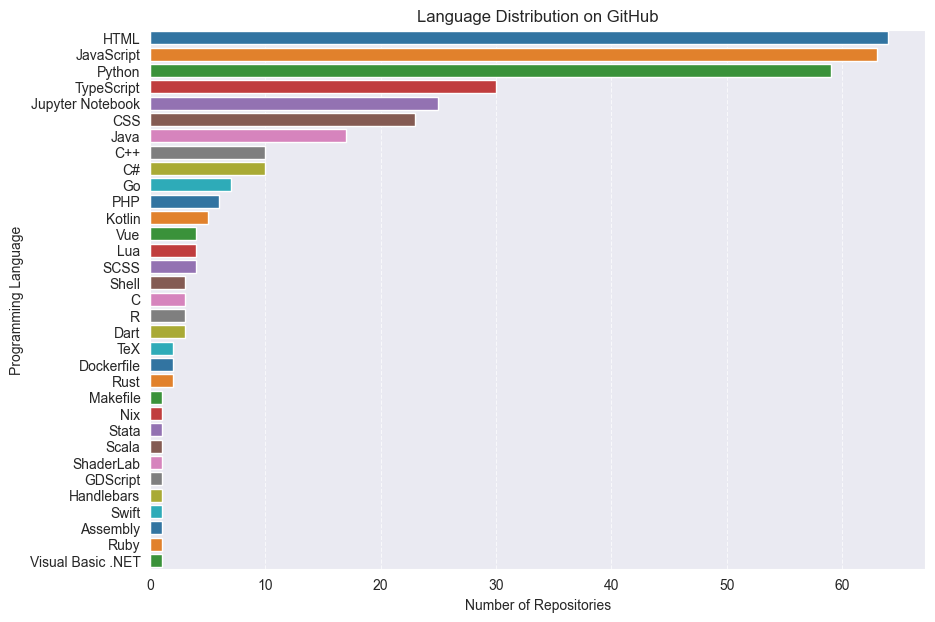

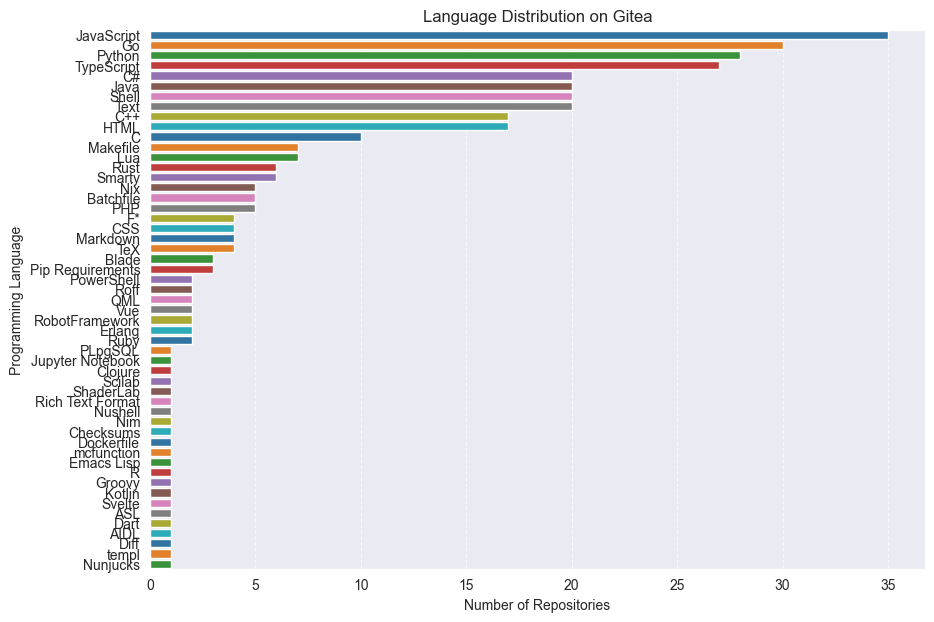

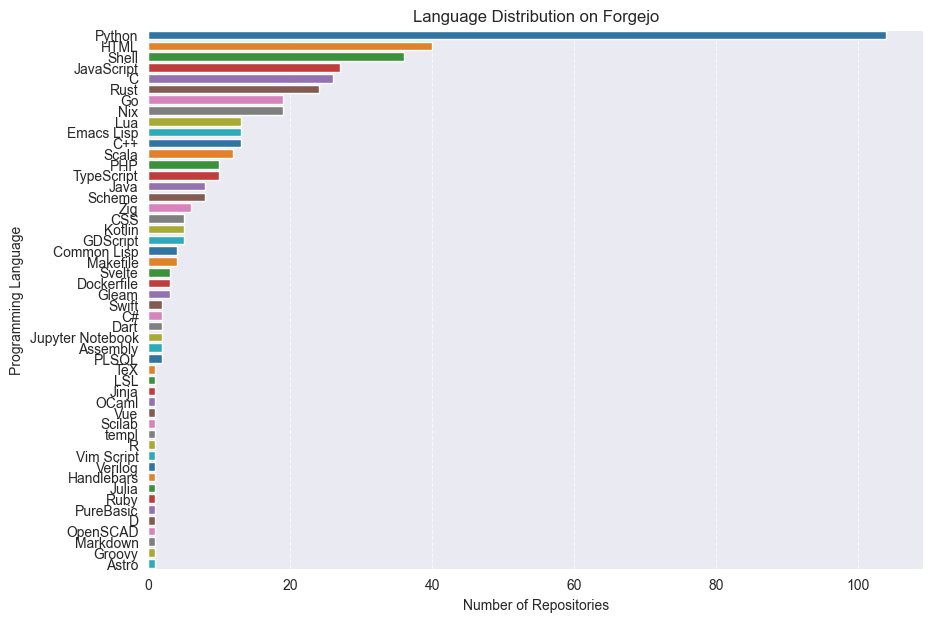

In [17]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")
df_forgejo = pd.read_csv("forgejo_repos_0_500.csv")

# Function to plot language distribution for a given dataframe and platform name
def plot_language_distribution(df, platform):
    df = df.dropna(subset=['Language'])  # Remove missing values

    # Count repositories per language
    language_counts = df['Language'].value_counts()

    # Sort by total popularity across all platforms
    language_counts = language_counts.sort_values(ascending=False)

    plt.figure(figsize=(10, 7))
    sns.barplot(x=language_counts.values, y=language_counts.index, hue=language_counts.index, palette='tab10', legend=False)
    plt.title(f"Language Distribution on {platform}")
    plt.xlabel("Number of Repositories")
    plt.ylabel("Programming Language")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Create the figures
plot_language_distribution(df_github, "GitHub")
plot_language_distribution(df_gitea, "Gitea")
plot_language_distribution(df_forgejo, "Forgejo")


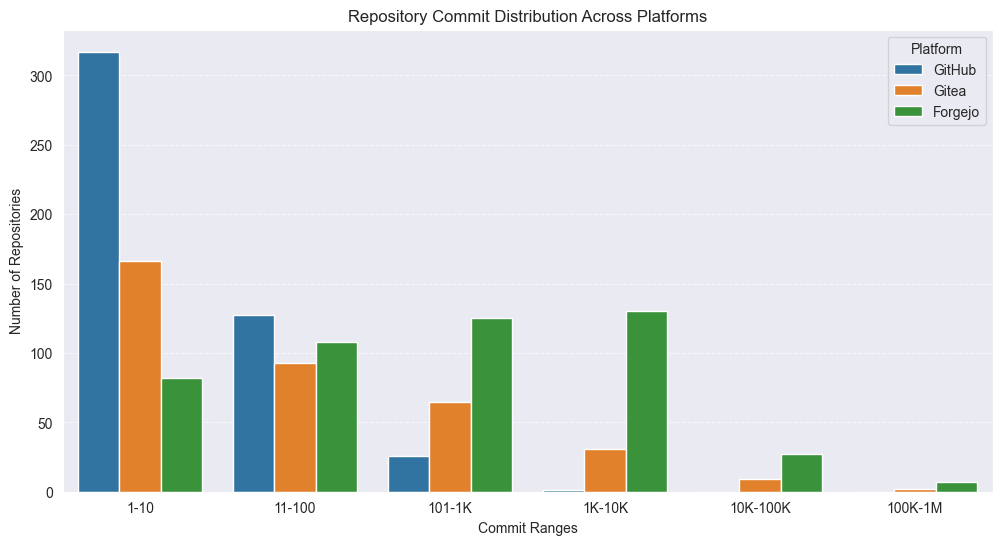

In [20]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")
df_forgejo = pd.read_csv("forgejo_repos_0_500.csv")

# Function to clean and bin commit data
def bin_commit_data(df, platform):
    df = df.dropna(subset=['#Commits']).copy()
    df.loc[:, '#Commits'] = pd.to_numeric(df['#Commits'], errors='coerce')  # Convert to numeric

    # Define commit ranges
    bins = [1, 10, 100, 1000, 10000, 100000, 1000000]
    labels = ["1-10", "11-100", "101-1K", "1K-10K", "10K-100K", "100K-1M"]

    # Create a new column with commit ranges
    df['Commit Range'] = pd.cut(df['#Commits'], bins=bins, labels=labels, include_lowest=True)

    # Count repositories per commit range
    commit_counts = df['Commit Range'].value_counts().reindex(labels, fill_value=0)

    return pd.DataFrame({'Platform': platform, 'Commit Range': labels, 'Count': commit_counts.values})

# Process each platform
df_github_bins = bin_commit_data(df_github, "GitHub")
df_gitea_bins = bin_commit_data(df_gitea, "Gitea")
df_forgejo_bins = bin_commit_data(df_forgejo, "Forgejo")

# Combine results
df_bins = pd.concat([df_github_bins, df_gitea_bins, df_forgejo_bins])

# Create the figure
plt.figure(figsize=(12, 6))
sns.barplot(x="Commit Range", y="Count", hue="Platform", data=df_bins, palette="tab10")

plt.xlabel("Commit Ranges")
plt.ylabel("Number of Repositories")
plt.title("Repository Commit Distribution Across Platforms")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Platform")

plt.show()


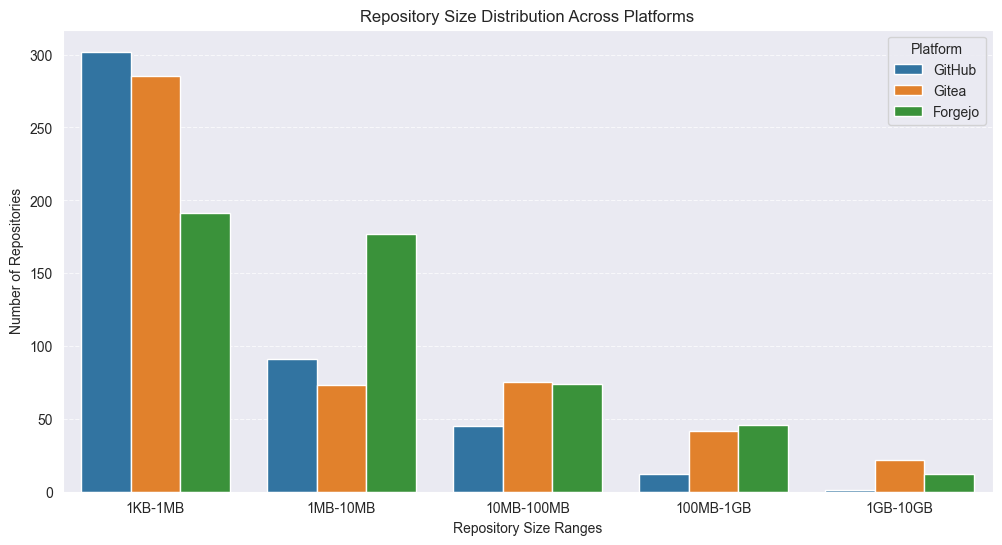

In [21]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")
df_forgejo = pd.read_csv("forgejo_repos_0_500.csv")

# Function to clean and bin repository sizes
def bin_size_data(df, platform):
    df = df.dropna(subset=['Size']).copy()
    df.loc[:, 'Size'] = pd.to_numeric(df['Size'], errors='coerce')  # Convert to numeric

    # Define size bins (MB converted from KB)
    bins = [1, 10**3, 10**4, 10**5, 10**6, 10**7]  # 1KB, 1MB, 10MB, 100MB, 1GB, 10GB
    labels = ["1KB-1MB", "1MB-10MB", "10MB-100MB", "100MB-1GB", "1GB-10GB"]

    # Create a new column with size ranges
    df['Size Range'] = pd.cut(df['Size'], bins=bins, labels=labels, include_lowest=True)

    # Count repositories per size range
    size_counts = df['Size Range'].value_counts().reindex(labels, fill_value=0)

    return pd.DataFrame({'Platform': platform, 'Size Range': labels, 'Count': size_counts.values})

# Process each platform
df_github_sizes = bin_size_data(df_github, "GitHub")
df_gitea_sizes = bin_size_data(df_gitea, "Gitea")
df_forgejo_sizes = bin_size_data(df_forgejo, "Forgejo")

# Combine results
df_sizes = pd.concat([df_github_sizes, df_gitea_sizes, df_forgejo_sizes])

# Create the figure
plt.figure(figsize=(12, 6))
sns.barplot(x="Size Range", y="Count", hue="Platform", data=df_sizes, palette="tab10")


plt.xlabel("Repository Size Ranges")
plt.ylabel("Number of Repositories")
plt.title("Repository Size Distribution Across Platforms")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Platform")

plt.show()

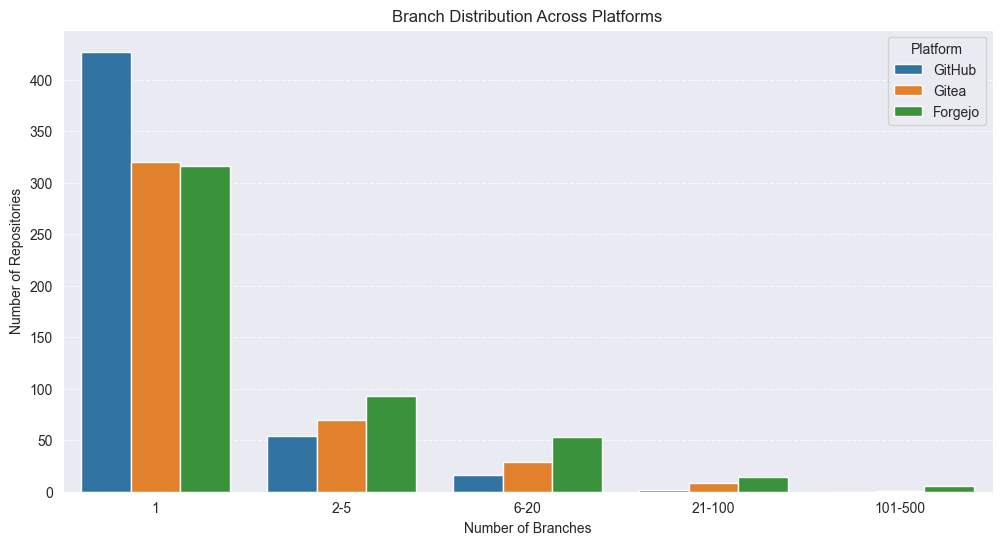

In [25]:
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")
df_forgejo = pd.read_csv("forgejo_repos_0_500.csv")

# Function to clean and bin the number of branches
def bin_branch_data(df, platform):
    df = df.dropna(subset=['#Branches']).copy()
    df.loc[:, '#Branches'] = pd.to_numeric(df['#Branches'], errors='coerce')  # Convert to numeric

    # Define branch bins
    bins = [0, 1, 5, 20, 100, 500]  # 1-5, 6-20, 21-100, 101-500, 501-1000
    labels = ["1", "2-5", "6-20", "21-100", "101-500"]

    # Create a new column with branch ranges
    df['Branch Range'] = pd.cut(df['#Branches'], bins=bins, labels=labels, include_lowest=True)

    # Count repositories per branch range
    branch_counts = df['Branch Range'].value_counts().reindex(labels, fill_value=0)

    return pd.DataFrame({'Platform': platform, 'Branch Range': labels, 'Count': branch_counts.values})

# Process each platform
df_github_branches = bin_branch_data(df_github, "GitHub")
df_gitea_branches = bin_branch_data(df_gitea, "Gitea")
df_forgejo_branches = bin_branch_data(df_forgejo, "Forgejo")

# Combine results
df_branches = pd.concat([df_github_branches, df_gitea_branches, df_forgejo_branches])

# Create the figure
plt.figure(figsize=(12, 6))
sns.barplot(x="Branch Range", y="Count", hue="Platform", data=df_branches, palette="tab10")

plt.xlabel("Number of Branches")
plt.ylabel("Number of Repositories")
plt.title("Branch Distribution Across Platforms")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Platform")

plt.show()


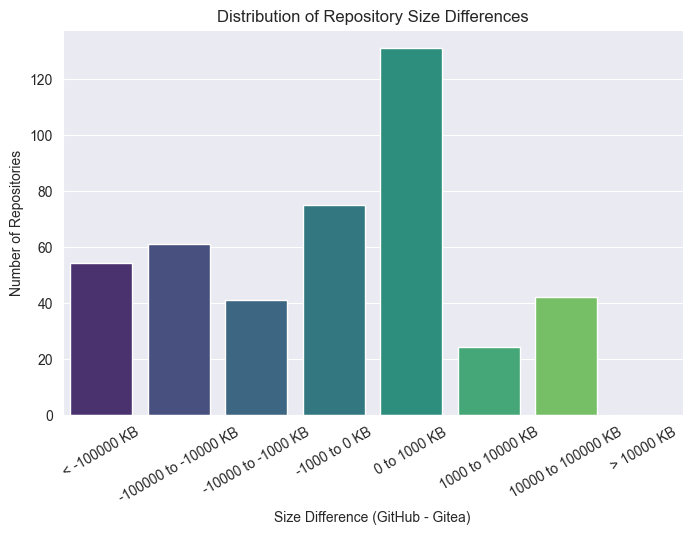

In [27]:
# Load Data
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

# Add Platform Column (GitHub = 1, Gitea = 0)
df_github["Platform"] = 1  # Treatment
df_gitea["Platform"] = 0   # Control

# Combine Data
df = pd.concat([df_github, df_gitea])

# Select Features for Matching (EXCLUDING "Size" since we compare it later)
features = ["#Stars", "#Forks", "#Issues", "#Branches"]
df = df.dropna(subset=features)  # Remove missing values

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df["Platform"]

# Fit Logistic Regression for Propensity Scores
logit = LogisticRegression()
logit.fit(X, y)

df["Propensity Score"] = logit.predict_proba(X)[:, 1]

# Separate Groups
df_treated = df[df["Platform"] == 1].copy()
df_control = df[df["Platform"] == 0].copy()

# Matching Using Nearest Neighbors
X_treated = df_treated["Propensity Score"].values.reshape(-1, 1)
X_control = df_control["Propensity Score"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

distances, indices = nn.kneighbors(X_control, n_neighbors=1)

# Get Matched Pairs
df_matched_treated = df_treated.iloc[indices.flatten()].reset_index(drop=True)
df_matched_control = df_control.reset_index(drop=True)

# Compute Size Difference
df_matched_control["Matched Size"] = df_matched_treated["Size"].values
df_matched_control["Size Difference"] = df_matched_treated["Size"].values - df_matched_control["Size"].values

# Define size difference bins (ranges)
bins = [-float("inf"), -100000, -10000, -1000, 0, 1000, 10000, 100000, float("inf")]
labels = ["< -100000 KB", "-100000 to -10000 KB", "-10000 to -1000 KB", "-1000 to 0 KB", "0 to 1000 KB", "1000 to 10000 KB", "10000 to 100000 KB", "> 10000 KB"]

# Create a new column to categorize size differences
df_matched_control["Size Difference Range"] = pd.cut(df_matched_control["Size Difference"], bins=bins, labels=labels)

# Count occurrences of each range
size_diff_counts = df_matched_control["Size Difference Range"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=size_diff_counts.index, y=size_diff_counts.values, hue=size_diff_counts.index, palette="viridis", legend=False)

# Formatting
plt.xlabel("Size Difference (GitHub - Gitea)")
plt.ylabel("Number of Repositories")
plt.title("Distribution of Repository Size Differences")
plt.xticks(rotation=30)
plt.show()

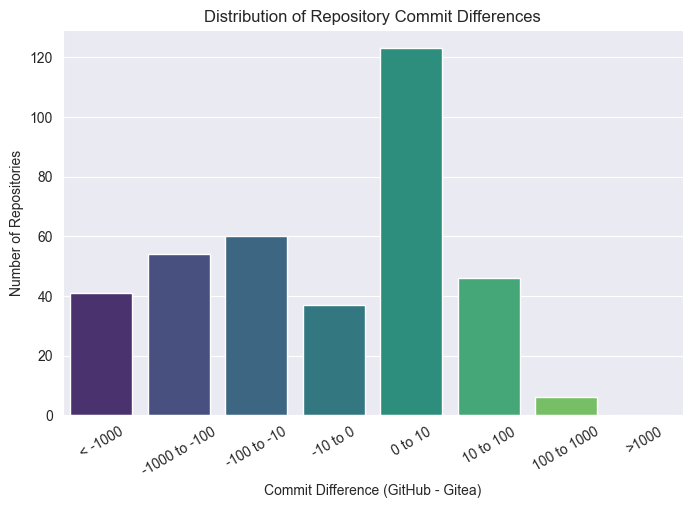

In [31]:
# Load Data
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

# Add Platform Column (GitHub = 1, Gitea = 0)
df_github["Platform"] = 1  # Treatment
df_gitea["Platform"] = 0   # Control

# Combine Data
df = pd.concat([df_github, df_gitea])

# Select Features for Matching (EXCLUDING "#Commits" since we compare it later)
features = ["#Stars", "#Forks", "#Issues", "#Branches"]
df = df.dropna(subset=features)  # Remove missing values

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df["Platform"]

# Fit Logistic Regression for Propensity Scores
logit = LogisticRegression()
logit.fit(X, y)

df["Propensity Score"] = logit.predict_proba(X)[:, 1]

# Separate Groups
df_treated = df[df["Platform"] == 1].copy()
df_control = df[df["Platform"] == 0].copy()

# Matching Using Nearest Neighbors
X_treated = df_treated["Propensity Score"].values.reshape(-1, 1)
X_control = df_control["Propensity Score"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

distances, indices = nn.kneighbors(X_control, n_neighbors=1)

# Get Matched Pairs
df_matched_treated = df_treated.iloc[indices.flatten()].reset_index(drop=True)
df_matched_control = df_control.reset_index(drop=True)

# Compute Commit Difference
df_matched_control["Matched Commits"] = df_matched_treated["#Commits"].values
df_matched_control["Commit Difference"] = df_matched_treated["#Commits"].values - df_matched_control["#Commits"].values

# Define commit difference bins (ranges)
bins = [-float("inf"), -1000, -100, -10, 0, 10, 100, 1000, float("inf")]
labels = ["< -1000", "-1000 to -100", "-100 to -10", "-10 to 0", "0 to 10", "10 to 100", "100 to 1000", ">1000"]

# Create a new column to categorize commit differences
df_matched_control["Commit Difference Range"] = pd.cut(df_matched_control["Commit Difference"], bins=bins, labels=labels)

# Count occurrences of each range
commit_diff_counts = df_matched_control["Commit Difference Range"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=commit_diff_counts.index, y=commit_diff_counts.values, hue=commit_diff_counts.index, palette="viridis", legend=False)

# Formatting
plt.xlabel("Commit Difference (GitHub - Gitea)")
plt.ylabel("Number of Repositories")
plt.title("Distribution of Repository Commit Differences")
plt.xticks(rotation=30)
plt.show()


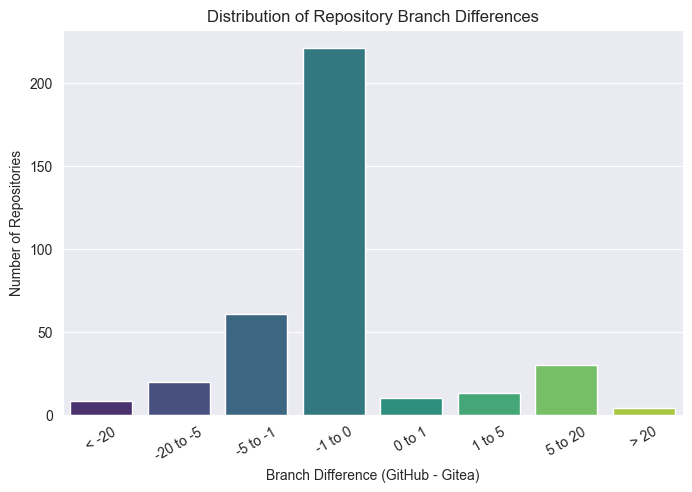

In [32]:
# Load Data
df_github = pd.read_csv("github_repos_0_500.csv")
df_gitea = pd.read_csv("gitea_repos_0_500.csv")

# Add Platform Column (GitHub = 1, Gitea = 0)
df_github["Platform"] = 1  # Treatment
df_gitea["Platform"] = 0   # Control

# Combine Data
df = pd.concat([df_github, df_gitea])

# Select Features for Matching (EXCLUDING "#Branches" since we compare it later)
features = ["#Stars", "#Forks", "#Issues", "#Commits"]
df = df.dropna(subset=features)  # Remove missing values

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df["Platform"]

# Fit Logistic Regression for Propensity Scores
logit = LogisticRegression()
logit.fit(X, y)

df["Propensity Score"] = logit.predict_proba(X)[:, 1]

# Separate Groups
df_treated = df[df["Platform"] == 1].copy()
df_control = df[df["Platform"] == 0].copy()

# Matching Using Nearest Neighbors
X_treated = df_treated["Propensity Score"].values.reshape(-1, 1)
X_control = df_control["Propensity Score"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_treated)

distances, indices = nn.kneighbors(X_control, n_neighbors=1)

# Get Matched Pairs
df_matched_treated = df_treated.iloc[indices.flatten()].reset_index(drop=True)
df_matched_control = df_control.reset_index(drop=True)

# Compute Branch Difference
df_matched_control["Matched Branches"] = df_matched_treated["#Branches"].values
df_matched_control["Branch Difference"] = df_matched_treated["#Branches"].values - df_matched_control["#Branches"].values

# Define branch difference bins (ranges)
bins = [-float("inf"), -20, -5, -1, 0, 1, 5, 20, float("inf")]
labels = ["< -20", "-20 to -5", "-5 to -1", "-1 to 0", "0 to 1", "1 to 5", "5 to 20", "> 20"]

# Create a new column to categorize branch differences
df_matched_control["Branch Difference Range"] = pd.cut(df_matched_control["Branch Difference"], bins=bins, labels=labels)

# Count occurrences of each range
branch_diff_counts = df_matched_control["Branch Difference Range"].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=branch_diff_counts.index, y=branch_diff_counts.values, hue=branch_diff_counts.index, palette="viridis", legend=False)

# Formatting
plt.xlabel("Branch Difference (GitHub - Gitea)")
plt.ylabel("Number of Repositories")
plt.title("Distribution of Repository Branch Differences")
plt.xticks(rotation=30)
plt.show()
